# Creating a Filter, Edge Detection

### Import resources and display image

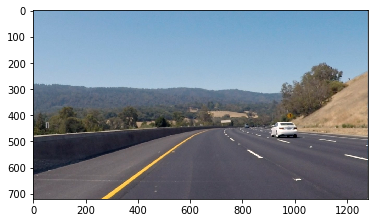

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread('images/curved_lane.jpg')

plt.imshow(image)

### Convert the image to grayscale

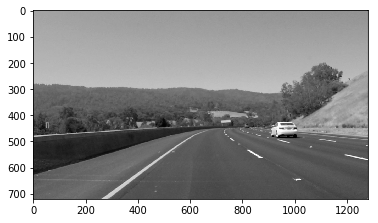

In [2]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

### TODO: Create a custom kernel

Below, you've been given one common type of edge detection filter: a Sobel operator.

The Sobel filter is very commonly used in edge detection and in finding patterns in intensity in an image. Applying a Sobel filter to an image is a way of **taking (an approximation) of the derivative of the image** in the x or y direction, separately. The operators look as follows.

<img src="images/sobel_ops.png" width=200 height=200>

**It's up to you to create a Sobel x operator and apply it to the given image.**

For a challenge, see if you can put the image through a series of filters: first one that blurs the image (takes an average of pixels), and then one that detects the edges.

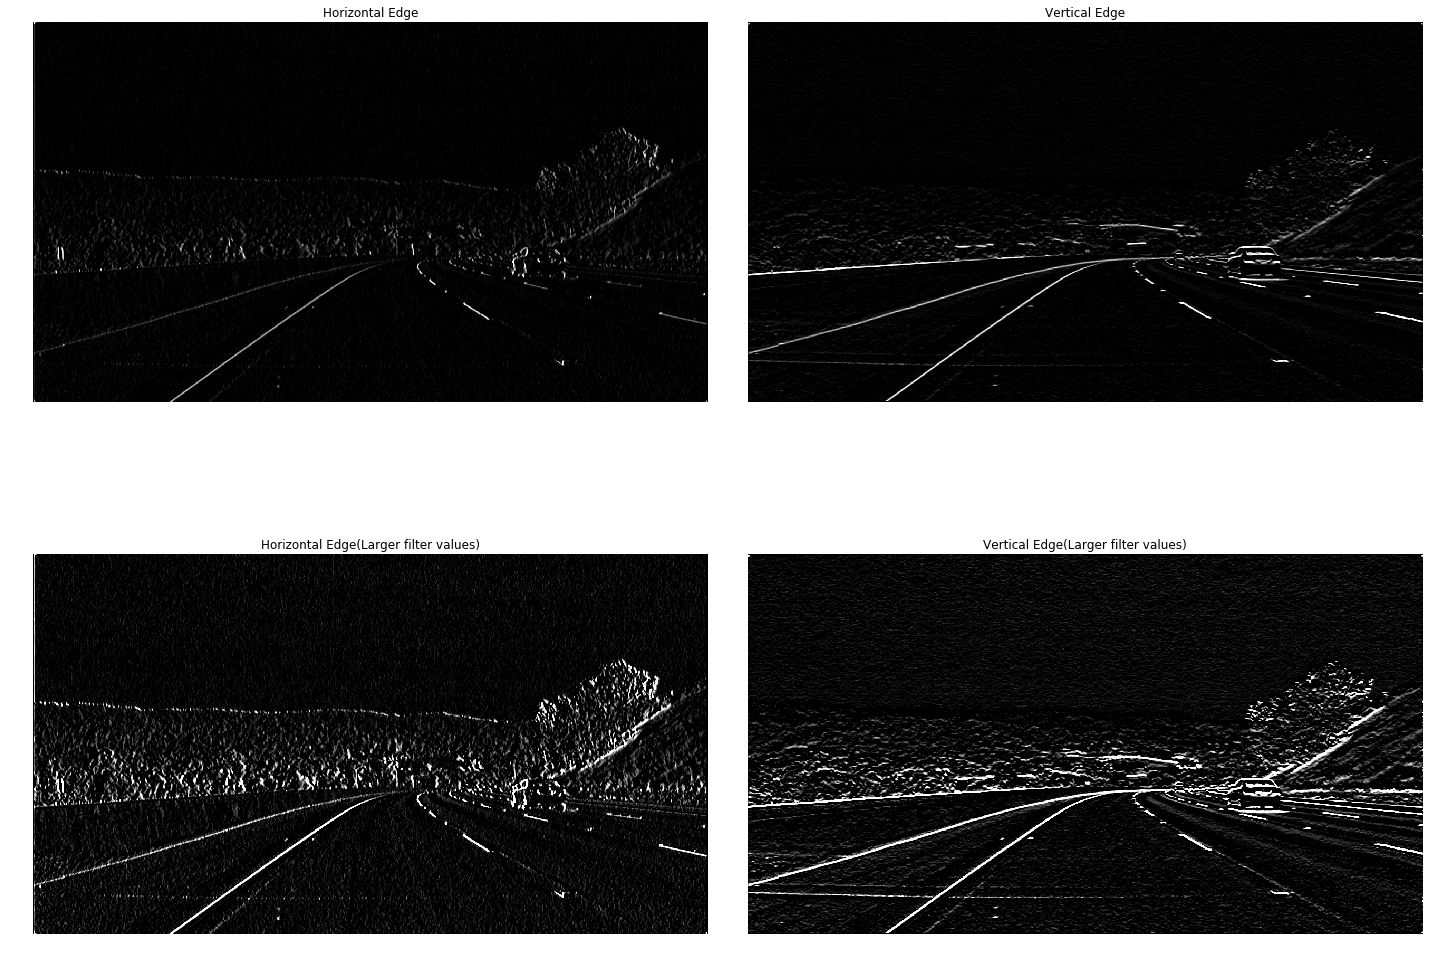

In [15]:
# Create a custom kernel

# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

## TODO: Create and apply a Sobel x operator
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image_x = cv2.filter2D(gray, -1, sobel_x)
filtered_image_y = cv2.filter2D(gray, -1, sobel_y)

filtered_image_x_1 = cv2.filter2D(gray, -1, 4*sobel_x)
filtered_image_y_1 = cv2.filter2D(gray, -1, 4*sobel_y)

images = {'Horizontal Edge': filtered_image_x, 'Vertical Edge': filtered_image_y, 
          'Horizontal Edge(Larger filter values)': filtered_image_x_1, 'Vertical Edge(Larger filter values)': filtered_image_y_1}

fig, axes = plt.subplots(2, 2, figsize=(20, 16))

for i, (title, image) in enumerate(images.items()):
    ax = axes[i//2, i%2]
    ax.imshow(image, cmap='gray')
    
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()

### Test out other filters!

You're encouraged to create other kinds of filters and apply them to see what happens! As an **optional exercise**, try the following:
* Create a filter with decimal value weights.
* Create a 5x5 filter
* Apply your filters to the other images in the `images` directory.



bridge_trees_example.jpg  curved_lane.jpg  sobel_ops.png  white_lines.jpg


In [104]:
import math
import cv2

def apply_filter(img, filter_x, edge=False, n=4, cols=2, cmap='gray', verbose=True):
    # Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
    filtered_image_x = cv2.filter2D(img, -1, filter_x)
    filtered_image_x_1 = cv2.filter2D(img, -1, n*filter_x)
    
    if edge:
        filtered_image_y = cv2.filter2D(img, -1, filter_x.T)
        filtered_image_y_1 = cv2.filter2D(img, -1, n*filter_x.T)

    images = {'Filter applied': filtered_image_x,
              'Filter applied(Larger filter values)': filtered_image_x_1}
    if edge:
        images = {'Horizontal Edge': filtered_image_x, 'Vertical Edge': filtered_image_y, 
              'Horizontal Edge(Larger filter values)': filtered_image_x_1, 'Vertical Edge(Larger filter values)': filtered_image_y_1}

    n_images = len(images.keys())
    rows = math.ceil(n_images/cols)
    
    if verbose:
        print(f"{n_images} to display")
        print(f"Images will be displayed in a {rows}x{cols} grid")
        
    
    fig, axes = plt.subplots(rows, cols, figsize=(20, 16))

    for i, (title, image) in enumerate(images.items()):
        if verbose:
            print(f"Image {i}: {title}")
        
        if rows == 1:
            ax = axes[i]
        else:
            ax = axes[i//2, i%2]
        
        if cmap == 'gray':
            image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        
        ax.imshow(image, cmap=cmap)
    
        ax.set_title(title)
        ax.axis('off')

    plt.tight_layout()

In [105]:
import matplotlib.image as mpimg

def display_image(path='', img=None, title='', return_image=False, cmap='gray', axis='off', tight_layout=True, verbose=True):
    if path != '':
        if verbose==True:
            print(f'Reading image - {path}')
        image = mpimg.imread(path)
    elif img != None:
        image = img
    else:
        print('Thanks for checking the function out. To get output, you need input!')
        return 0
    
    plt.axis(axis)
    plt.title(title)
    
    if tight_layout==True:
        plt.tight_layout()
    
    if cmap == 'gray':
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    plt.imshow(image, cmap=cmap)
    
    if return_image == True:
        return image

Reading image - images/bridge_trees_example.jpg


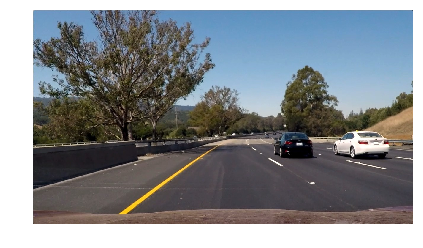

In [106]:
path = 'images/bridge_trees_example.jpg'

bridge_tree = display_image(path, return_image=True, cmap=None) # give cmap=None if to use the image returned otherwise
                                                                # the image will already be grayscale and apply_filter will
                                                                # again try to do it

In [107]:
gaussian = np.ones((3,3))
gaussian

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

2 to display
Images will be displayed in a 1x2 grid
Image 0: Filter applied
Image 1: Filter applied(Larger filter values)


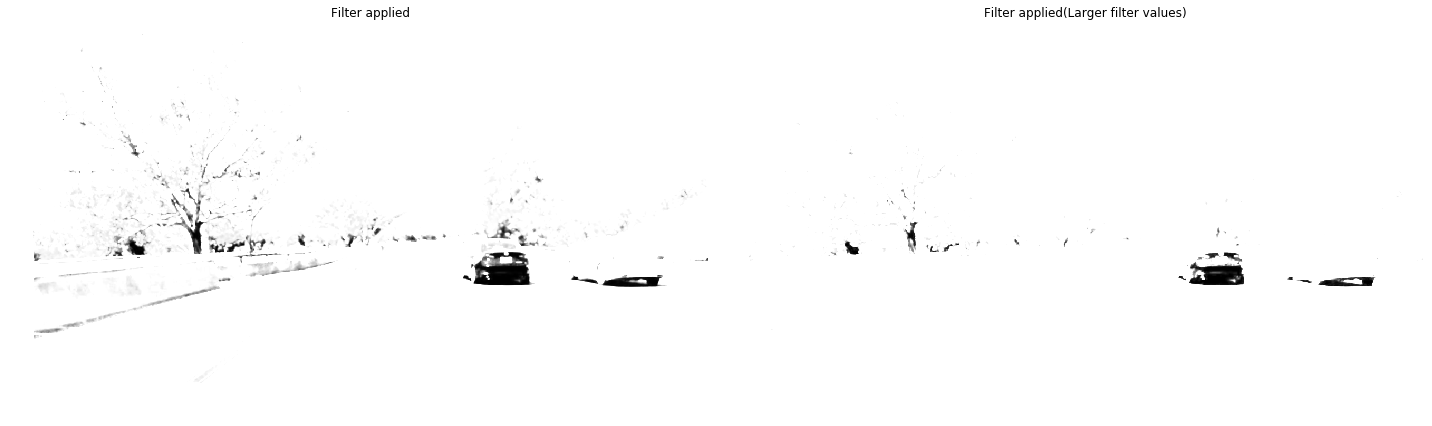

In [108]:
apply_filter(bridge_tree, gaussian, cmap='gray')

4 to display
Images will be displayed in a 2x2 grid
Image 0: Horizontal Edge
Image 1: Vertical Edge
Image 2: Horizontal Edge(Larger filter values)
Image 3: Vertical Edge(Larger filter values)


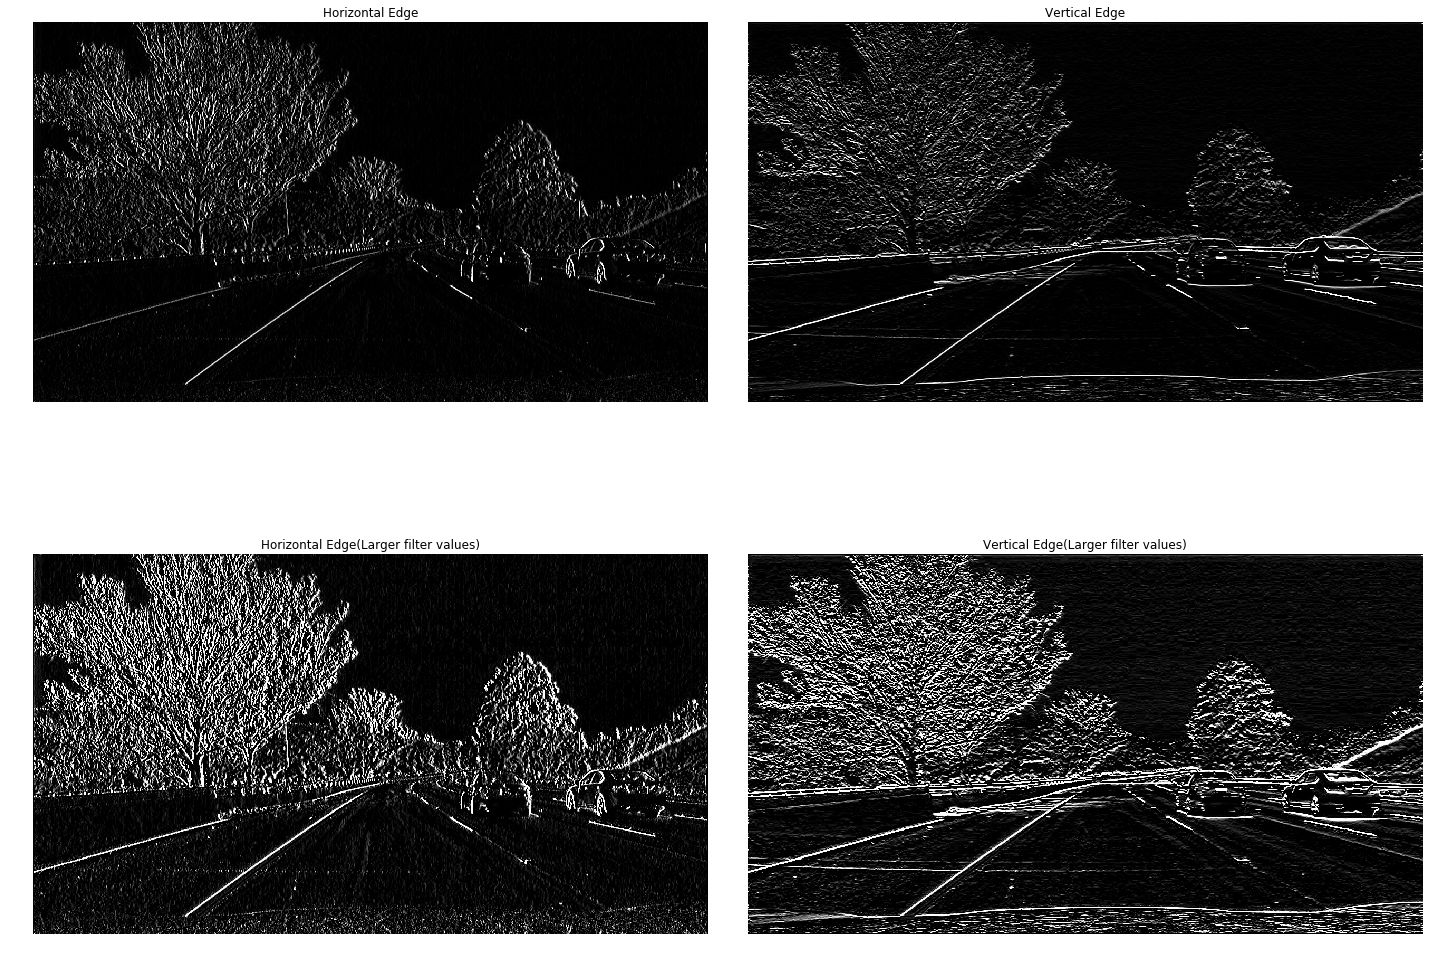

In [109]:
apply_filter(bridge_tree, sobel_x, edge=True)